In [1]:
import xarray as xr
import dask
import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pickle
import pandas as pd
import itertools
import seaborn as sns
sns.set('paper')
from scipy import integrate
from scipy.signal import detrend
colors =itertools.cycle(plt.get_cmap('plasma')(np.linspace(0.2,0.9, 3)))
colorA=next(colors)

colorC=next(colors)
colorB=next(colors)
#import basemap
#fig sizes
Wf=(190/25.4)
Hf=(230/25.4)
Wf4=(95/25.4)
Hf4=(115/25.4)

color1='#00CD6C'#green
color2='#AF58BA'#purple
color3='#FFC61E' #yello
color4='#009ADE' #blue
color5='#F28522' #orange
color6='#A0B1BA' #gray
color7='#A6761D'#brown
color8='#FF1F5B' #red

ERROR 1: PROJ: proj_create_from_database: Open of /home/amh001/space_fs7/software_2022/python/py_2024/share/proj failed


In [2]:
cluster_data_path = '/home/amh001/space_fs7/DATA/NEP36-CanOE/From_Andrew/'
#cluster_data_path = './'
clusters_ds=[]
for ii in range(6):
    
    cluster_files = sorted(glob.glob(f'{cluster_data_path}/processed/daily/by_year/by_cluster/n_clusters_6/cluster_{ii}*.nc')) 
    #print(cluster_files    )
    cluster_ds =xr.open_mfdataset(cluster_files, chunks={'time':439}, engine='h5netcdf')
    clusters_ds.append(cluster_ds)
    print(len(cluster_ds.stacked_y_x))


9308
4005
3330
4124
7978
5006


In [3]:
hist_kwargs = {
    'alpha':1,
    'density':True,
    'bins':25,
    'edgecolor':'None'
}

In [4]:
plot_clusters = [0, 3]
plot_clusters2 = [1, 2,4 ,5]

subpanel = ['a','b','c','d', 'e', 'f', 'g','h','i','j']

cluster_names = {2:'2',1:'1',3:'Shallows', 4:'4', 0:'Canyons', 5:'5', 6:'6' }

In [5]:
def plot_myhist(X,bins,color, label):
    histogram, bins = np.histogram(X,  bins=bins, density =True); 
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    plt.plot(bin_centers, histogram, color =color, linewidth=1,label=label)

262.8805803045675 (81593928,)
63.339926711807536 (35107830,)
716.7499778953759 (29190780,)
28.902779191472252 (36150984,)
151.1059828218167 (69935148,)
101.1585130954427 (43882596,)


(0.0, 1000.0)

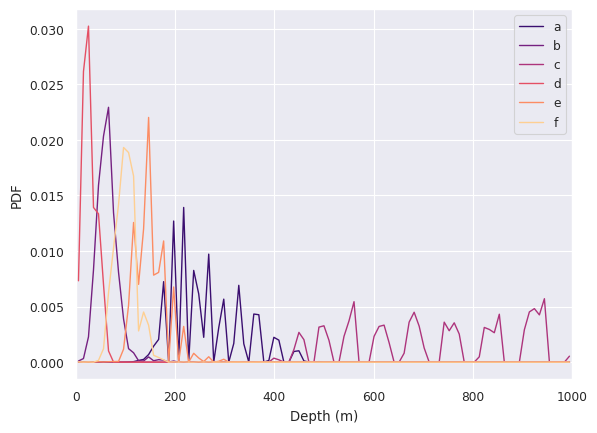

In [6]:
#for cluster_ds in clusters_ds:
colors =itertools.cycle(plt.get_cmap('magma')(np.linspace(0.2,0.9, 6)))# same as clusters plot

#colors =itertools.cycle(plt.get_cmap('inferno')(np.linspace(0.15,0.9, 6)))
a=0;b=1000
bins = np.linspace(a, b, 100)
subpanel = ['a','b','c','d', 'e', 'f', 'g','h','i','j']

for ii in np.arange(6):
    col=next(colors)
    cluster_id = ii#plot_clusters[ii]
    D=clusters_ds[cluster_id].depths.values.flatten()
    print(D.mean(), np.shape(D))
    #plt.hist(D.flatten(),label='Shallows',density=True,  color=colorA)
    #plt.hist(D,label=subpanel[ii], **hist_kwargs, color=col)
    plot_myhist(D,bins,col, subpanel[ii])#cluster_names[ii])
plt.legend()
plt.ylabel('PDF')
plt.xlabel('Depth (m)')
plt.xlim([0,1000])
#plt.savefig('../Figures/AllClusters_depths_100bins.png',bbox_inches='tight',transparent=False,dpi=500)#'+str(cluster_names[cluster_label])+'.jpg', format='jpg', bbox_inches='tight',transparent=False,dpi=500)      

cluster: 0 mean for  O2
90.85747
AOU 211.0362773198771
cluster: 0 mean for  OmegaA
0.7288309952334068
cluster: 0 mean for  T
6.159807
cluster: 3 mean for  O2
282.68933
AOU 5.250099352248382
cluster: 3 mean for  OmegaA
1.6325930921277798
cluster: 3 mean for  T
9.129531


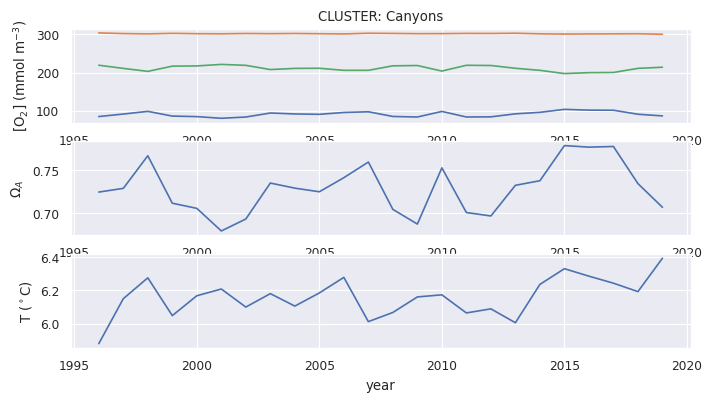

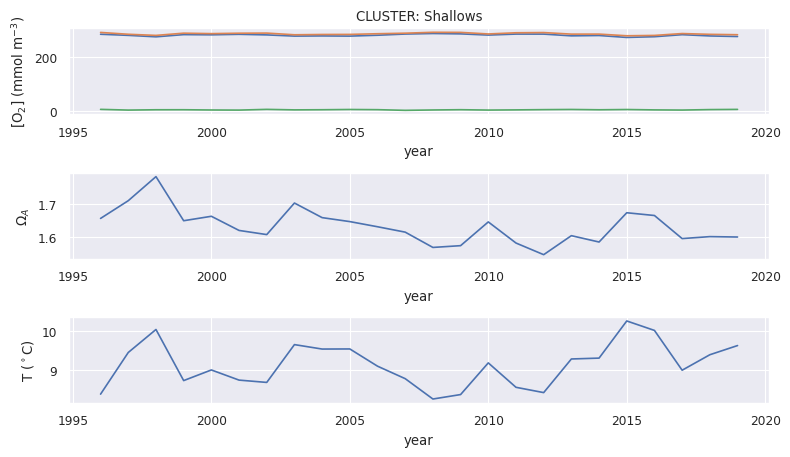

In [7]:
# Plot timeseries of all the relevant variables

timeseries_vars = [
    'O2',
    'OmegaA',
    'T',
    # 'ALK_norm',
    # 'DIC_norm',
    # 'ALK',
    # 'DIC',
]


long_names = dict(
    O2=r"$[\mathrm{O}_2]$",
    OmegaA="$\Omega_A$",
    T="T"
    # ALK_norm="Normalized Alkalinity",
    # DIC_norm="Normalized DIC",
    # ALK="Alkalinity",
    # DIC="DIC",
)

units = dict(
    O2="mmol m$^{-3}$",
    OmegaA="(non-dimensional)",
    T="$^\circ$C",
    
    # ALK_norm="mmolk m$^{-3}$",
    # DIC_norm="mmolk m$^{-3}$",
    # ALK="mmolk m$^{-3}$",
    # DIC="mmolk m$^{-3}$"
)


for cluster_label, cluster_ds in enumerate(clusters_ds):
    if cluster_label in plot_clusters:
        plt.figure(figsize=(8,10))    
        for idx, var in enumerate(timeseries_vars):        
            plt.subplot(7,1,idx+1)
            cluster_ds[var].groupby('time.year').mean('time').mean('stacked_y_x').plot()
            print('cluster:', cluster_label, 'mean for ', var)
            print(cluster_ds[var].mean().values)
            if var =='O2':
                (cluster_ds[var].groupby('time.year').mean('time').mean('stacked_y_x')+cluster_ds['AOU'].groupby('time.year').mean('time').mean('stacked_y_x')).plot()
                cluster_ds['AOU'].groupby('time.year').mean('time').mean('stacked_y_x').plot()
                print('AOU', cluster_ds['AOU'].mean().values)

            if var=='OmegaA':
                plt.ylabel(f"{long_names[var]}")
            else:
                plt.ylabel(f"{long_names[var]} ({units[var]})")
            if idx == 0:
                plt.title(f'CLUSTER: '+ cluster_names[cluster_label])# {cluster_label}')
            else:
                plt.title('')
plt.tight_layout()   

let's try remaking the plot with the seasonal cylce removed

In [8]:
# Split by upwelling season
downwelling_months = [10, 11, 12, 1, 2, 3]
upwelling_months   = [4, 5, 6, 7, 8, 9]
timeseries_vars = ['O2','OmegaA','T']
hist_kwargs = {
    'alpha':0.7,
    'density':True,
    'bins':200,
    'edgecolor':'None'
}

def filter_by_season_and_values(ds,month_range):       
    ds_out = ds.where(ds['time.month'].isin(month_range),drop=True)
    return ds_out

In [9]:
# plt.style.use(['seaborn-notebook'])

In [10]:
linecolors = dict(
    pdf = 'k',
    cdf = 'b'
)
linestyles = dict(
    Upwelling = '-',
    Downwelling = '--'
)

def plot_cdf_pdf(da_upwelling, da_downwelling, nbins=100):
    da_list = ((da_upwelling, 'Upwelling'), (da_downwelling, 'Downwelling'))
    for da, label in da_list:
        data = da.to_numpy().flatten()
        hist, edges = np.histogram(data, bins=nbins, density=True)
        cdf = integrate.cumtrapz(hist,edges[1:])
        
        plt.plot(edges[1:], hist, color=linecolors['pdf'], linewidth=1, linestyle = linestyles[label], label=f'{label}-PDF')
        plt.plot(edges[2:], cdf, color=linecolors['cdf'], linewidth=1, linestyle = linestyles[label], label=f'{label}-CDF')

In [11]:
for cluster_ds in clusters_ds:
    for i, var in enumerate(timeseries_vars):
        mean_data = np.mean(cluster_ds[var], axis=0)
        #print(np.shape(mean_data.values))
        detrended_data=detrend(cluster_ds[var], axis=0, type='linear')+mean_data.values
        #print(np.shape(detrended_data))
        cluster_ds[var + '_det'] = (cluster_ds[var].dims, detrended_data)

In [12]:
def PickleforPlots(y):
    x=y.time

    # make a dataframe with groups separated that are over a day apart
    data = []
    g = 0
    for i in range(len(x)):
        x0 = x[i].values
        #print('xo', x0)
        y0 = y[i].values
        if i < (len(x)-1):
            x1 = x[i+1]
            td = x1 - x0
            #print(td)
            elapsed_days = td/np.timedelta64(1, 'D')
            
            if elapsed_days < 2:
                
                data.append([x0,y0, g])
            else:
                data.append([x0,y0, g])
                g+=1
        else:
            data.append([x0,y0, g])
    
    return pd.DataFrame(data, columns=['x', 'y', 'group'])
def plot_fraction_extreme(ax, ds, thresholds, vars, plot_months, extreme_is_low, label,color,saveit):
    #saveit=1 save the seasons in a dataframe that will allow for plotting the lines separately.
    #saveit=2 save the frac_)extreme for computing correlations
    #saveit=0 do not save, plot
    frac_extreme = calc_extremes(ds, thresholds, vars)
    frac_extreme = frac_extreme.where(frac_extreme['time.month'].isin(plot_months))
    if saveit=='lines': 
        outfile='pickles/'+label +'.pickle'
        print('saving:', outfile) 
        df=PickleforPlots(frac_extreme)
        with open(outfile, 'wb') as handle:
                pickle.dump(df, handle)
    elif saveit=='corr':
        outfile='pickles/'+label +'_corr.pickle'
        print('saving:', outfile)
        with open(outfile, 'wb') as handle:
            pickle.dump(frac_extreme, handle)
    else:
         ax.scatter(frac_extreme.time, frac_extreme, label=label, s=2, color=color)
    


Cluster label: 1


/tmp/ipykernel_59007/1951521990.py:22: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cdf = integrate.cumtrapz(hist,edges[1:])


	O2 Upwelling: 117.8
	O2 Downwelling: 163.8


/tmp/ipykernel_59007/1951521990.py:22: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cdf = integrate.cumtrapz(hist,edges[1:])


	OmegaA Upwelling: 0.8
	OmegaA Downwelling: 1.0


/tmp/ipykernel_59007/1951521990.py:22: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cdf = integrate.cumtrapz(hist,edges[1:])


	T Upwelling: 9.3
	T Downwelling: 10.1
Cluster label: 2


/tmp/ipykernel_59007/1951521990.py:22: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cdf = integrate.cumtrapz(hist,edges[1:])


	O2 Upwelling: 16.9
	O2 Downwelling: 17.0


/tmp/ipykernel_59007/1951521990.py:22: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cdf = integrate.cumtrapz(hist,edges[1:])


	OmegaA Upwelling: 0.5
	OmegaA Downwelling: 0.5


/tmp/ipykernel_59007/1951521990.py:22: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cdf = integrate.cumtrapz(hist,edges[1:])


	T Upwelling: 5.0
	T Downwelling: 5.2
Cluster label: 4


/tmp/ipykernel_59007/1951521990.py:22: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cdf = integrate.cumtrapz(hist,edges[1:])


	O2 Upwelling: 66.0
	O2 Downwelling: 86.3


/tmp/ipykernel_59007/1951521990.py:22: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cdf = integrate.cumtrapz(hist,edges[1:])


	OmegaA Upwelling: 0.6
	OmegaA Downwelling: 0.7


/tmp/ipykernel_59007/1951521990.py:22: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cdf = integrate.cumtrapz(hist,edges[1:])


	T Upwelling: 7.3
	T Downwelling: 8.3
Cluster label: 5


/tmp/ipykernel_59007/1951521990.py:22: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cdf = integrate.cumtrapz(hist,edges[1:])


	O2 Upwelling: 80.4
	O2 Downwelling: 113.7


/tmp/ipykernel_59007/1951521990.py:22: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cdf = integrate.cumtrapz(hist,edges[1:])


	OmegaA Upwelling: 0.6
	OmegaA Downwelling: 0.8


/tmp/ipykernel_59007/1951521990.py:22: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cdf = integrate.cumtrapz(hist,edges[1:])


	T Upwelling: 8.0
	T Downwelling: 9.3


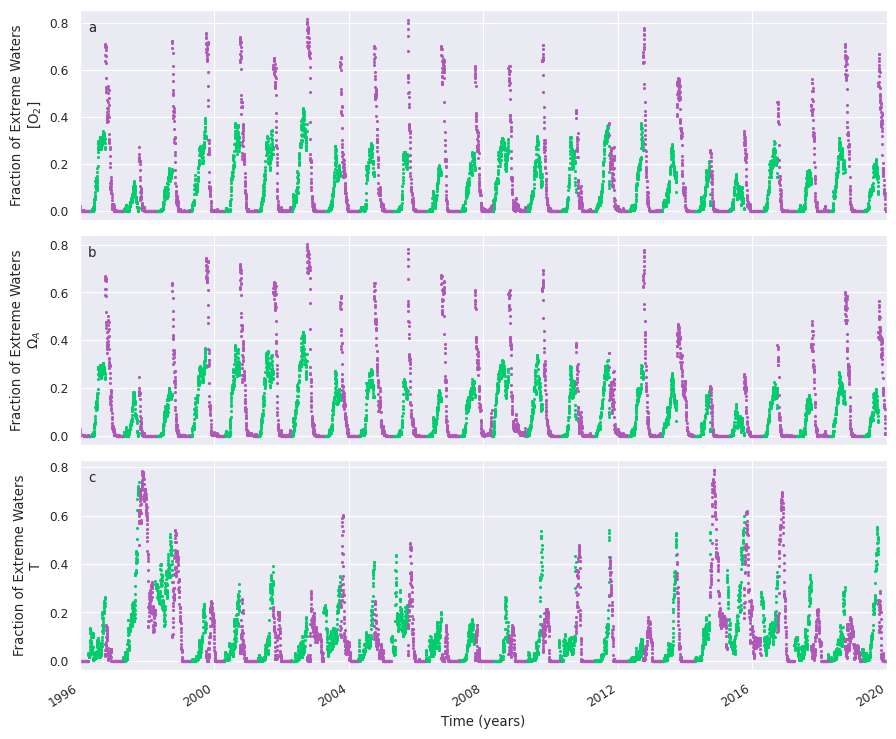

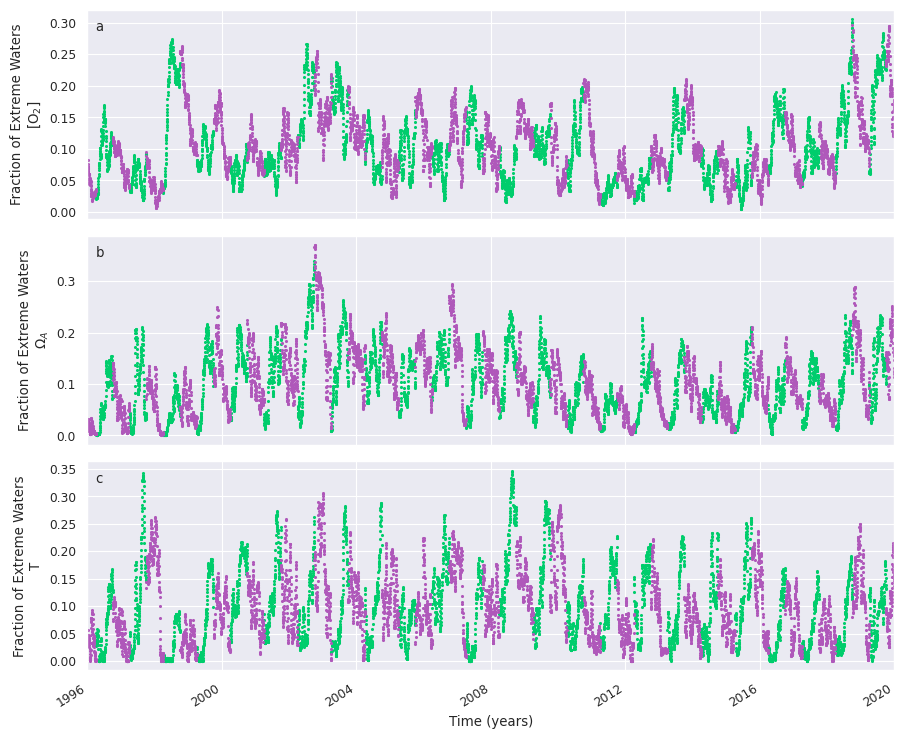

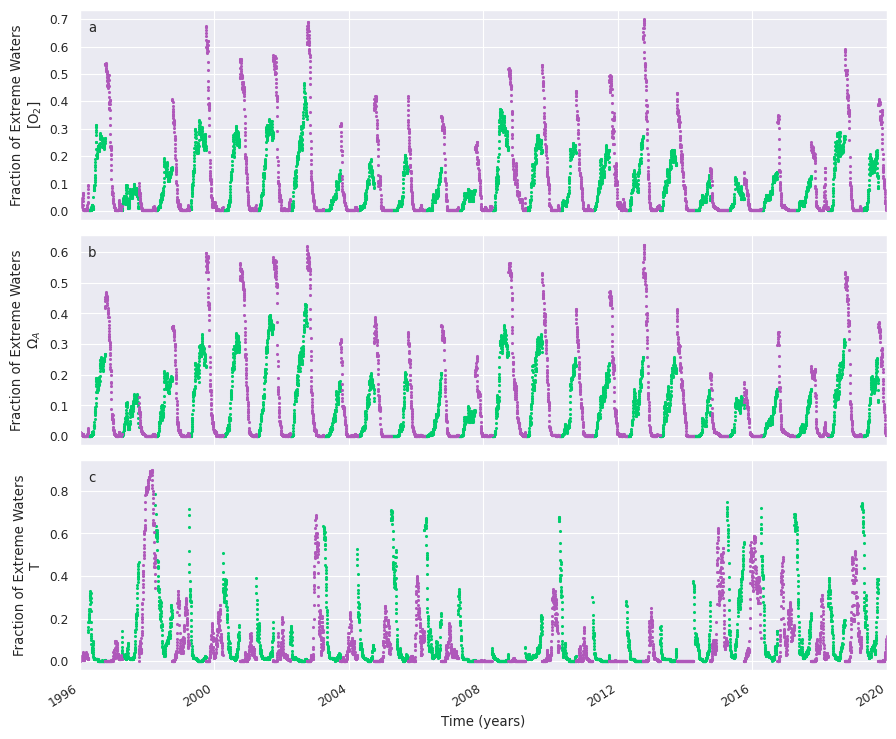

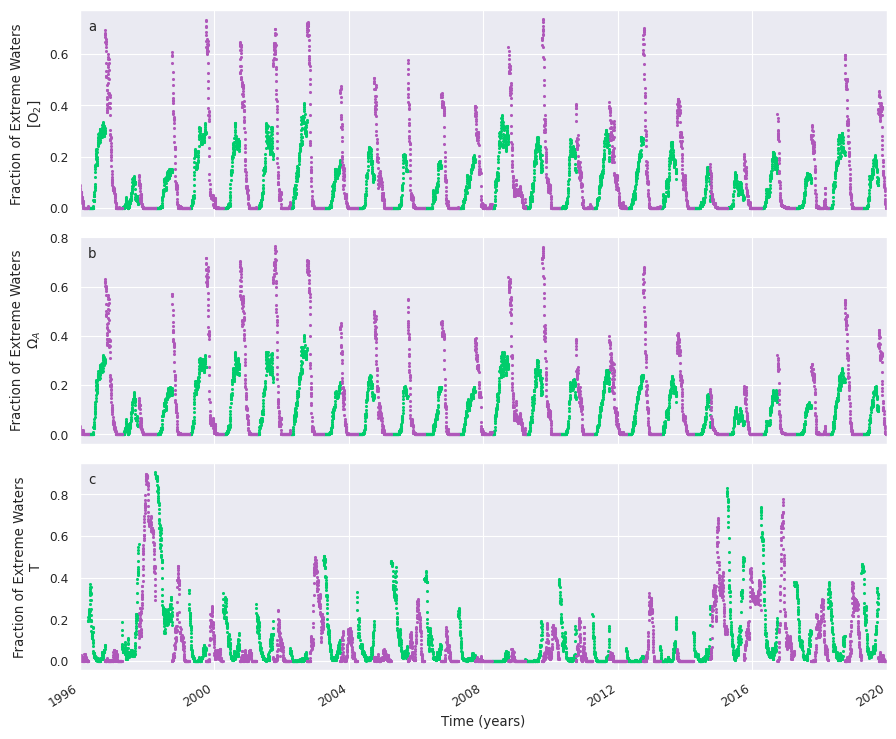

In [13]:
# Calculate extreme thresholds by upwelling/downwelling season and plot timeseries of percentage extremes
downwelling_months = [10, 11, 12, 1, 2, 3]
upwelling_months   = [4, 5, 6, 7, 8, 9]
timeseries_vars = ['O2','OmegaA','T']
hist_kwargs = {
    'alpha':0.5,
    'density':True,
    'bins':100
}

base_percentile = 0.1
percentiles = {
    'O2':base_percentile,
    'OmegaA':base_percentile,
    'T':1-base_percentile
}
at=0.01
bt=0.95
def calculate_threshold(ds, percentile, nbins=1000):
    data = ds.to_numpy().flatten()
    hist, edges = np.histogram(data, bins=nbins, density=True)
    cdf = integrate.cumtrapz(hist,edges[1:])
    return np.interp(percentile, cdf, edges[2:])    

def calc_extremes(ds, thresholds, vars):
    """Calculate which points in the domain exceed multiple thresholds"""
    is_extreme = xr.full_like(ds[vars[0]], True, dtype=bool)
    for var in vars:
        if var == 'T':
            is_extreme=is_extreme & (ds[var+ '_det'] >= thresholds[var+ '_det'])
        else:
            is_extreme=is_extreme & (ds[var+ '_det'] <= thresholds[var+ '_det'])
    npts = len(ds.stacked_y_x)
    frac_extreme = is_extreme.sum('stacked_y_x')/npts
    return frac_extreme


upwelling = {}
downwelling = {}

thresholds = {}

for cluster_label, cluster_ds in enumerate(clusters_ds):    
    if cluster_label in plot_clusters2[:]:
        thresholds[cluster_label] = {}
        thresholds[cluster_label]['upwelling'] = {}
        thresholds[cluster_label]['downwelling'] = {}
        ds_months = cluster_ds.groupby('time.month')
        
        # For every dataset separate data in upwelling and downwelling months
        upwelling_ds = filter_by_season_and_values(cluster_ds, upwelling_months)    
        downwelling_ds = filter_by_season_and_values(cluster_ds, downwelling_months)    
    
        upwelling[cluster_label] = upwelling_ds.copy()
        downwelling[cluster_label] = downwelling.copy()
        print(f'Cluster label: {cluster_label}')
                   
        fig, axs = plt.subplots(3, 1, sharex=True, figsize=(Hf,Wf))
        for idx, var in enumerate(timeseries_vars):         
            percentile = percentiles[var]
            upwelling_threshold = calculate_threshold(upwelling_ds[var+ '_det'],percentile)
            downwelling_threshold = calculate_threshold(downwelling_ds[var+ '_det'],percentile)
            thresholds[cluster_label]['upwelling'][var+ '_det'] = upwelling_threshold
            thresholds[cluster_label]['downwelling'][var+ '_det'] = downwelling_threshold
            print(f'\t{var} Upwelling: {upwelling_threshold:.1f}')
            print(f'\t{var} Downwelling: {downwelling_threshold:.1f}')
            plot_fraction_extreme(
                axs[idx],
                upwelling_ds, 
                thresholds[cluster_label]['upwelling'],
                [var],
                upwelling_months,
                percentile == base_percentile,
                f'Upwelling_{cluster_label}_{var}',
                color=color1,
                saveit="1"
            )
            plot_fraction_extreme(
                axs[idx],
                downwelling_ds, 
                thresholds[cluster_label]['downwelling'],
                [var],
                downwelling_months,
                percentile == base_percentile,
                f'Downwelling_{cluster_label}_{var}',
                color=color2,
                saveit="1"
            )

            axs[idx].set_ylabel(f'Fraction of Extreme Waters\n{long_names[var]}')
            if idx==2:
                axs[idx].set_xlabel('Time (years)')
                for label in axs[idx].get_xticklabels():
                    label.set_rotation(32)
                    label.set_horizontalalignment("right")
            plt.axis('tight')
            X=axs[idx].get_xticks()
            plt.xlim([X[1], X[-2]])  
            axs[idx].text(at, bt, subpanel[idx], transform=axs[idx].transAxes,  va='top', fontweight='normal',zorder=1000)


        fig.tight_layout()


see the LinePlots notebook for the line plot instead of scatter

In [14]:
def calc_concurrent_extremes(ds, thresholds, vars):
    is_extreme = xr.full_like(ds[vars[0]], True, dtype=bool)
    for var in vars:
        if var == 'T':
            is_extreme=is_extreme & (ds[var+ '_det'] >= thresholds[var+ '_det'])
        else:
            is_extreme=is_extreme & (ds[var+ '_det'] <= thresholds[var+ '_det'])
        npts = len(ds.stacked_y_x)
        frac_extreme = is_extreme.sum('stacked_y_x')/npts
        return frac_extreme
    
    

Cluster label: 1
Cluster label: 2
Cluster label: 4
Cluster label: 5


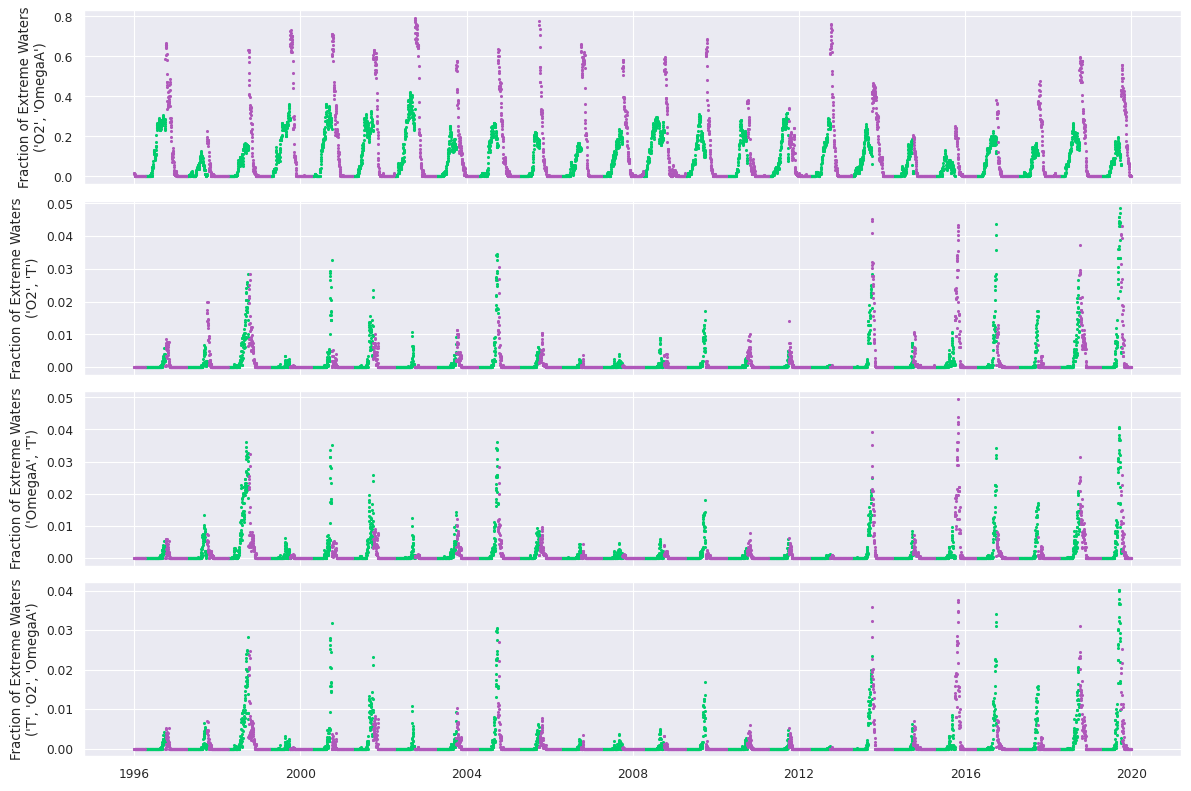

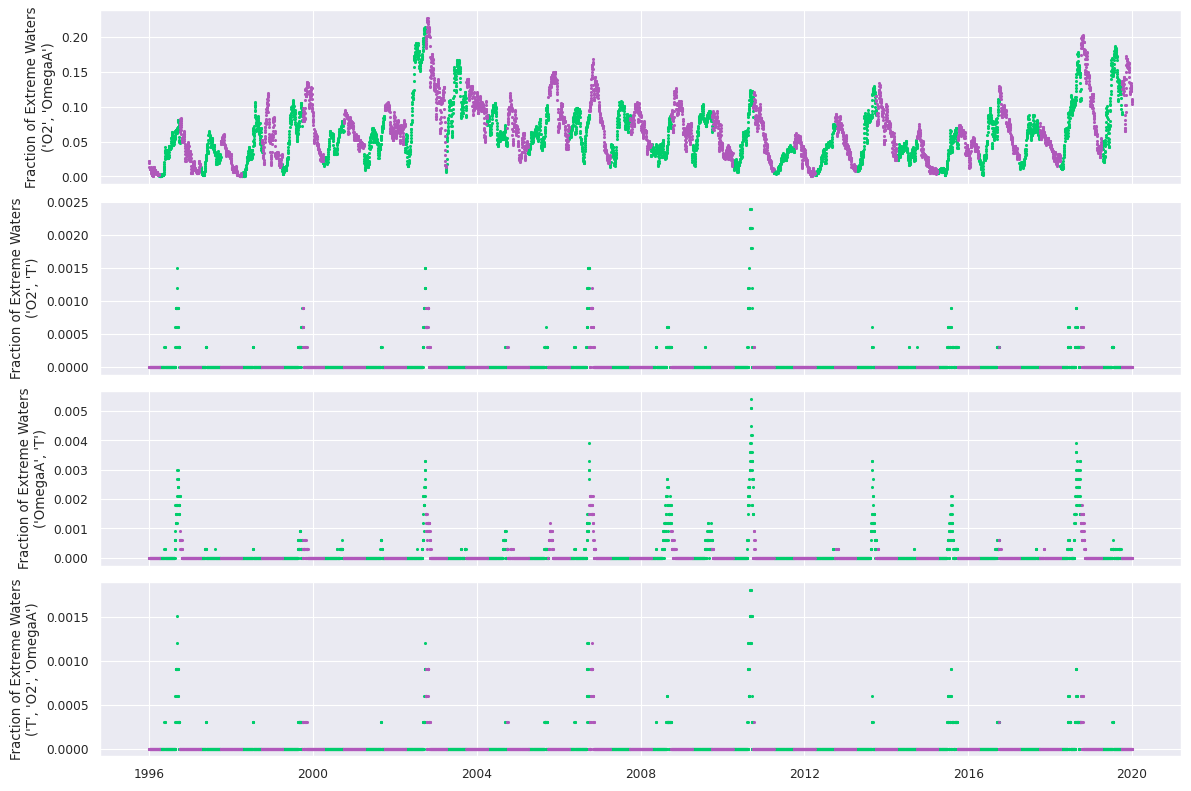

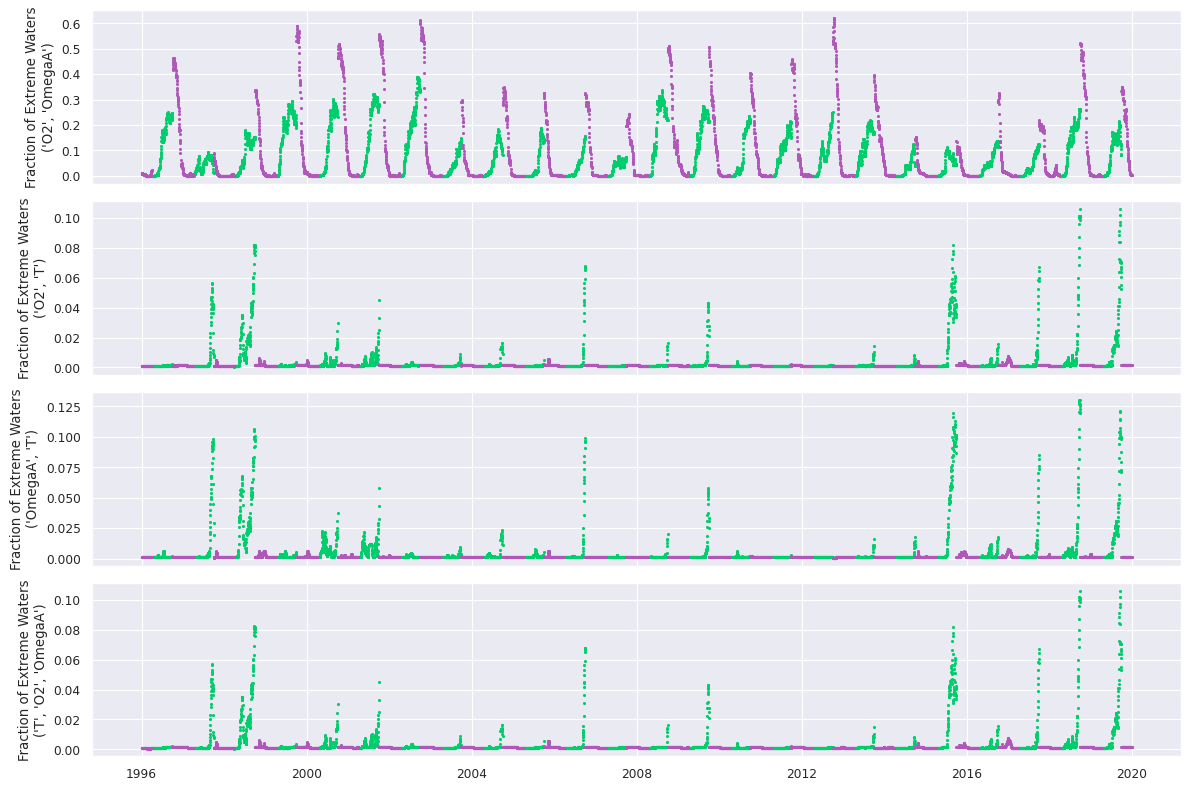

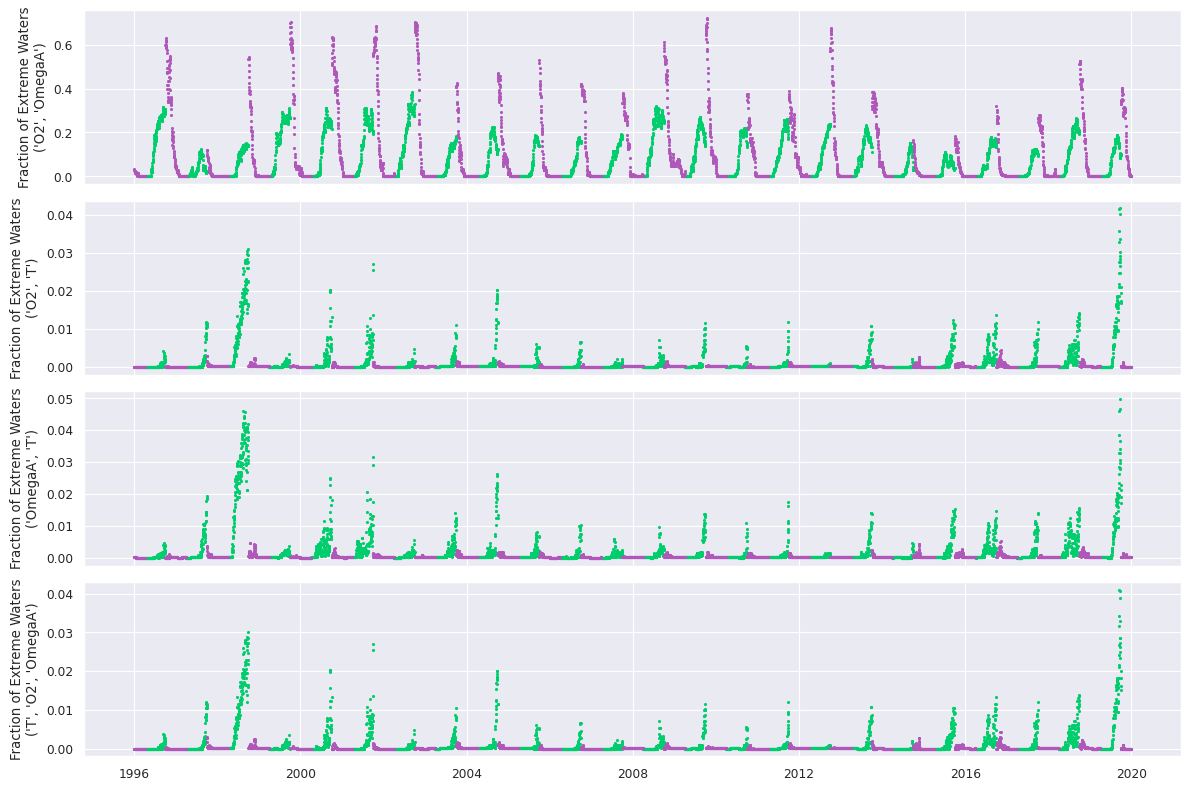

In [16]:
downwelling_months = [10, 11, 12, 1, 2, 3]
upwelling_months   = [4, 5, 6, 7, 8, 9]
dual_extreme = list(itertools.combinations(timeseries_vars, 2))
dual_extreme += [('T','O2','OmegaA')]

for cluster_label, cluster_ds in enumerate(clusters_ds):    
    if cluster_label in plot_clusters2:
        # For every dataset separate data in upwelling and downwelling months
        upwelling_ds = filter_by_season_and_values(cluster_ds, upwelling_months)    
        downwelling_ds = filter_by_season_and_values(cluster_ds, downwelling_months)    
    
        upwelling[cluster_label] = upwelling_ds.copy()
        downwelling[cluster_label] = downwelling.copy()
        print(f'Cluster label: {cluster_label}')

        
        fig, axs = plt.subplots(len(dual_extreme), 1, sharex=True, figsize=(12,8))
        for idx, vars in enumerate(dual_extreme):         
            plot_fraction_extreme(
                axs[idx],
                upwelling_ds, 
                thresholds[cluster_label]['upwelling'],
                vars,
                upwelling_months,
                True,
                 f'Upwelling_{cluster_label}_'+dual_extreme[idx][0]+dual_extreme[idx][1],
                color=color1, 
                saveit='1'
            )
            plot_fraction_extreme(
                axs[idx],
                downwelling_ds, 
                thresholds[cluster_label]['downwelling'],
                vars,
                downwelling_months,
                True,
                f'Downwelling_{cluster_label}_'+dual_extreme[idx][0]+dual_extreme[idx][1],
                color=color2, 
                saveit='1'
            )
            axs[idx].set_ylabel(f'Fraction of Extreme Waters\n{vars}')
        fig.tight_layout()

In [17]:
for idx, vars in enumerate(dual_extreme):
    print(dual_extreme[idx][0]+dual_extreme[idx][1])
    print(f'Upwelling_{cluster_label}_'+dual_extreme[idx][0]+dual_extreme[idx][1])
    print(vars) 

O2OmegaA
Upwelling_5_O2OmegaA
('O2', 'OmegaA')
O2T
Upwelling_5_O2T
('O2', 'T')
OmegaAT
Upwelling_5_OmegaAT
('OmegaA', 'T')
TO2
Upwelling_5_TO2
('T', 'O2', 'OmegaA')


In [23]:
def count_average_length(array):
    """
    Calculate the duration of the times when a point in the cluster is extreme, return the average extreme duration
    """
    binary_string = ''.join(str(bit) for bit in array)
    
    # Split the string into runs of ones using the '0' character as a separator.
    ones_runs = binary_string.split('0')
    
    # Filter out empty strings (if the input binary string starts or ends with 0).
    ones_runs = [run for run in ones_runs if run != '']
    
    # Calculate and store the length of each run of non_zeroes
    run_lengths = [len(run) for run in ones_runs]
    
    mean_length = np.array(run_lengths).mean()
    return np.array([mean_length])

def plot_max_avg_duration(cluster_ds, var, threshold, season, season_months):
    var_ds = cluster_ds[var+ '_det']
    if var == 'T':
        var_ds = var_ds.where(var_ds > threshold[season][var+ '_det'], 0)
    else:
        var_ds = var_ds.where(var_ds < threshold[season][var+ '_det'], 0)
    var_ds = var_ds.where(cluster_ds['time.month'].isin(season_months), 0)
    max_duration = []
    avg_duration = []
    years = []
    for year, ds_year in var_ds.groupby('time.year'):
        lengths = xr.apply_ufunc(count_average_length, ds_year.load(), input_core_dims = [['time']], vectorize=True)
        max_duration.append(lengths.max(dim='stacked_y_x'))
        avg_duration.append(lengths.mean(dim='stacked_y_x'))
        years.append(year) 
    print('var', var)
    print('The average duration is ', np.mean(avg_duration), 'And average max duration ', np.mean(max_duration))
    return np.mean(avg_duration), np.mean(max_duration)
    #plt.figure()
    #plt.bar(years, max_duration)

In [22]:
thresholds

{1: {'upwelling': {'O2_det': 117.7711655641735,
   'OmegaA_det': 0.7689871123961185,
   'T_det': 9.339250687681616},
  'downwelling': {'O2_det': 163.75554793969562,
   'OmegaA_det': 1.0213510955100926,
   'T_det': 10.144776584499091}},
 2: {'upwelling': {'O2_det': 16.914142652996276,
   'OmegaA_det': 0.4942108374777151,
   'T_det': 5.03449662410107},
  'downwelling': {'O2_det': 17.047597619485206,
   'OmegaA_det': 0.49562533201281217,
   'T_det': 5.188924097382919}},
 4: {'upwelling': {'O2_det': 66.04065336829083,
   'OmegaA_det': 0.616548557064114,
   'T_det': 7.3036283177004915},
  'downwelling': {'O2_det': 86.33417763010162,
   'OmegaA_det': 0.6786113128205381,
   'T_det': 8.314189193527247}},
 5: {'upwelling': {'O2_det': 80.39639840954923,
   'OmegaA_det': 0.643858590004883,
   'T_det': 7.968681880913515},
  'downwelling': {'O2_det': 113.67643370383131,
   'OmegaA_det': 0.7833934812710186,
   'T_det': 9.313928398203345}}}

var O2
The average duration is  1.3783691502459823 And average max duration  3.4804846845938635
var OmegaA
The average duration is  1.538891339812319 And average max duration  4.058329173185054
var T
The average duration is  1.3440304426092233 And average max duration  4.7500807841174195
var O2
The average duration is  1.5084520760896158 And average max duration  6.954078755492731
var OmegaA
The average duration is  1.5457340923730996 And average max duration  5.398916008651137
var T
The average duration is  1.4164561410603014 And average max duration  6.258567231186213
var O2
The average duration is  1.4117183603725538 And average max duration  6.4451837727835795
var OmegaA
The average duration is  1.527260577318338 And average max duration  5.5128648543568985
var T
The average duration is  1.400225051126295 And average max duration  6.913863827041328
var O2
The average duration is  1.4078681636346666 And average max duration  4.546797878971754
var OmegaA
The average duration is  1.52

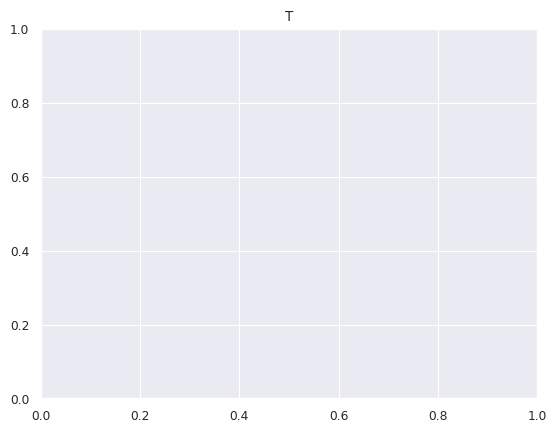

In [24]:
for cluster_label, cluster_ds in enumerate(clusters_ds):
    if cluster_label in plot_clusters2:
        for var in timeseries_vars:
            plot_max_avg_duration(cluster_ds, var, thresholds[cluster_label], 'upwelling', upwelling_months)
            plt.title(var)

var O2
The average duration is  1.400765531287669 And average max duration  2.7298306930819867
var OmegaA
The average duration is  1.5874819198734198 And average max duration  4.954299094430758
var T
The average duration is  1.3332081027760967 And average max duration  2.774338500604303
var O2
The average duration is  1.4947718995403776 And average max duration  6.875340554925818
var OmegaA
The average duration is  1.5471999441079891 And average max duration  5.4875440218247675
var T
The average duration is  1.4545899573923755 And average max duration  6.533838543354613
var O2
The average duration is  1.38392442324415 And average max duration  6.368111376676161
var OmegaA
The average duration is  1.5803285941450145 And average max duration  5.422294400339131
var T
The average duration is  1.3773926963226302 And average max duration  6.82266368614862
var O2
The average duration is  1.3557049439552937 And average max duration  3.702284132991481
var OmegaA
The average duration is  1.58980

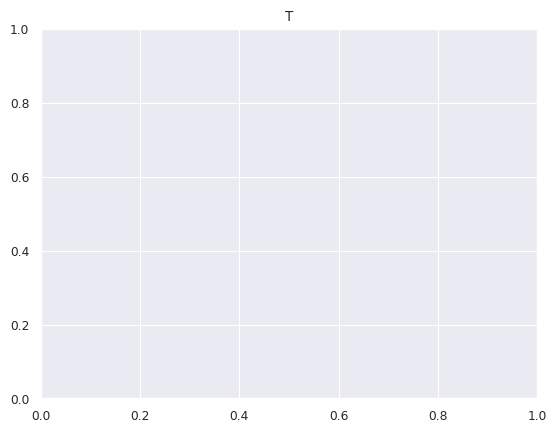

In [25]:
for cluster_label, cluster_ds in enumerate(clusters_ds):
    if cluster_label in plot_clusters2:
        for var in timeseries_vars:
            plot_max_avg_duration(cluster_ds, var, thresholds[cluster_label], 'downwelling', downwelling_months)
            plt.title(var)

Intensity is defined here as the difference between the threshold and the observed value. For temperature ($T$) this is defined as

$I_T= T - T_{threshold}$

For $\Omega_A$ and $O_2$, the sign is reversed to maintain the convention that a positive intensity is considered an extreme event.

Annual cumulative intensity is defined as the sum of intensity and averaged over every point in the cluster. The average intensity is averaged both in time and over every point of the cluster

In [27]:
def plot_cumulative_intensity(cluster_ds, var, threshold, season, season_months):
    var_ds = cluster_ds[var+ '_det']

    # Positive intensity implies an extreme event, negative is not
    if var == 'T':
        intensity = var_ds - threshold[season][var+ '_det']
    else:
        intensity = threshold[season][var+ '_det'] - var_ds
        
    intensity = xr.where(intensity < 0, np.nan, intensity)
    intensity = xr.where(~intensity['time.month'].isin(season_months), np.nan, intensity)

    cumulative_intensity = intensity.groupby('time.year').sum(['time']).mean('stacked_y_x', skipna=True)
    average_intensity = intensity.groupby('time.year').mean(['time', 'stacked_y_x'], skipna=True)

    plt.subplot(1,2,1)
    plt.plot(cumulative_intensity.year, cumulative_intensity)
    plt.title(var+ '_det')
    plt.subplot(1,2,2)
    plt.plot(cumulative_intensity.year, average_intensity)
    plt.tight_layout()
    


Cluster: 1
Cluster: 2
Cluster: 4
Cluster: 5


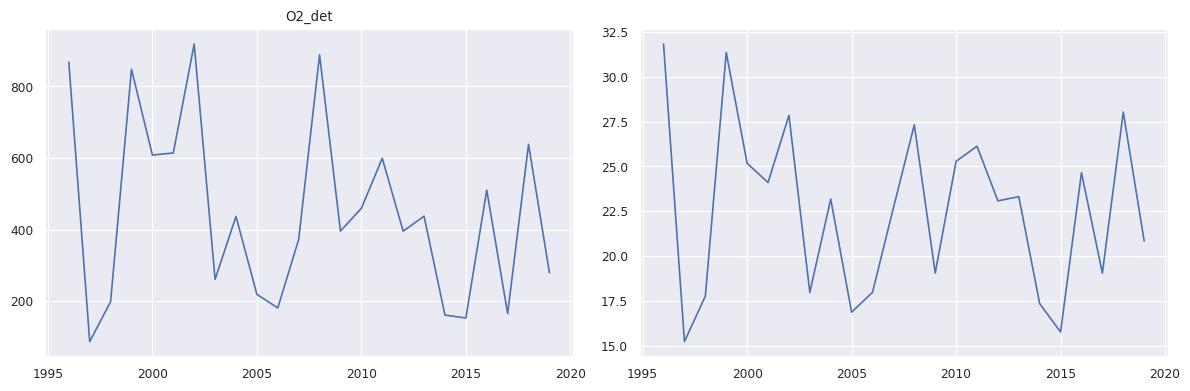

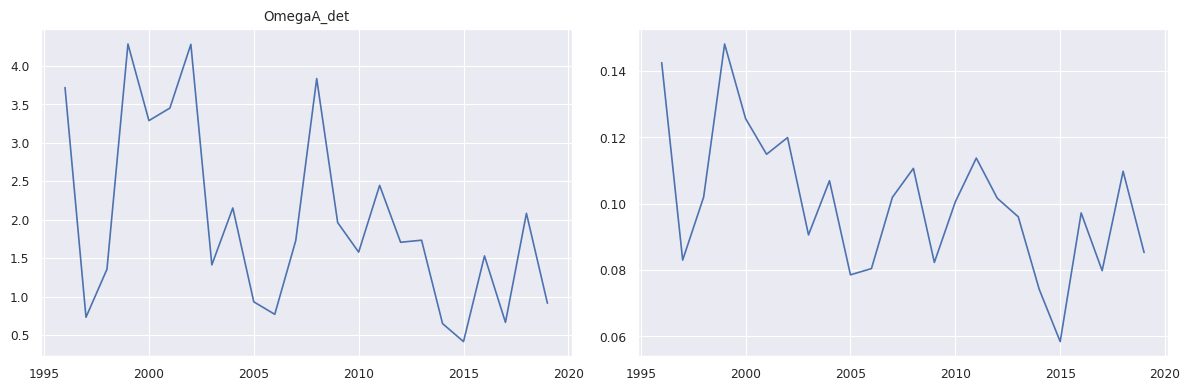

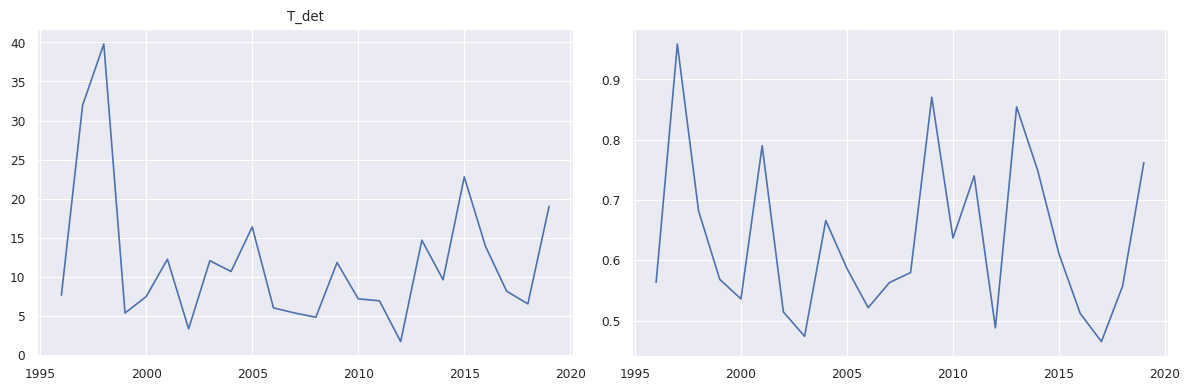

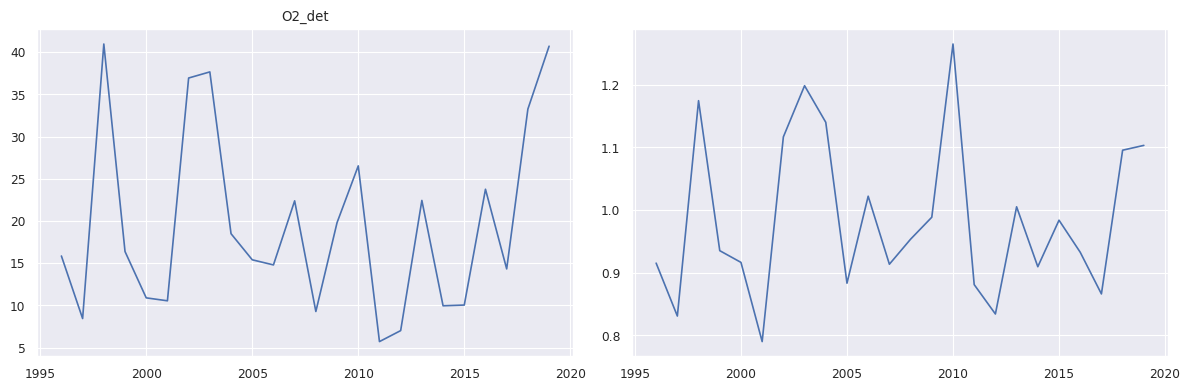

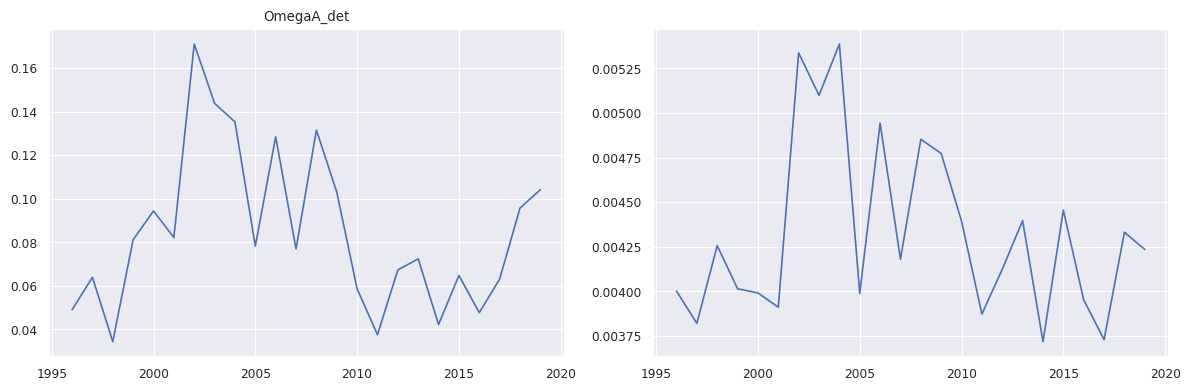

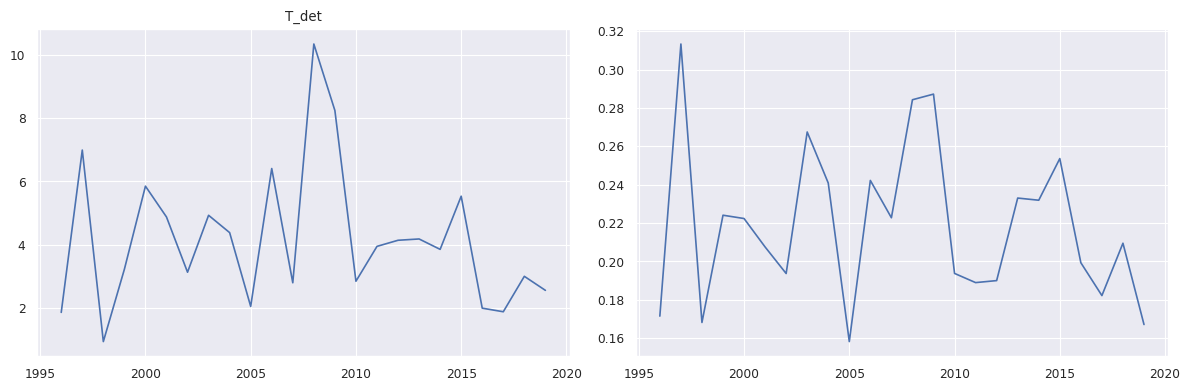

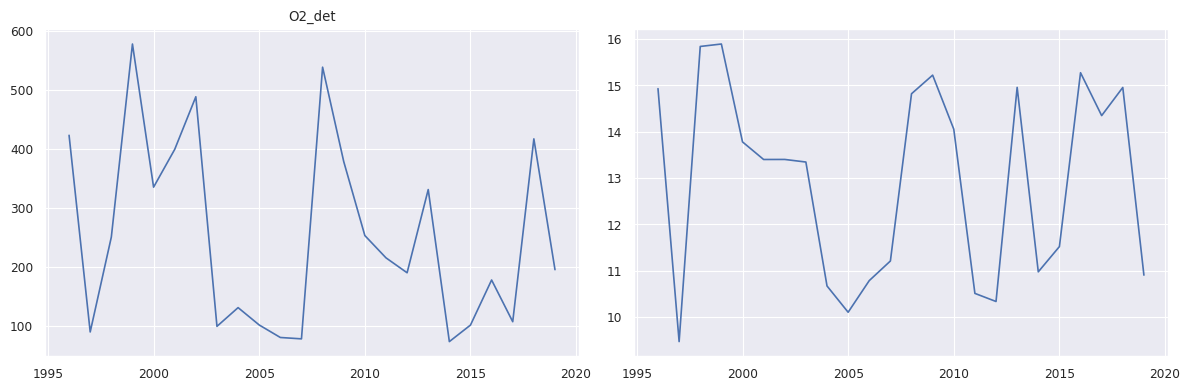

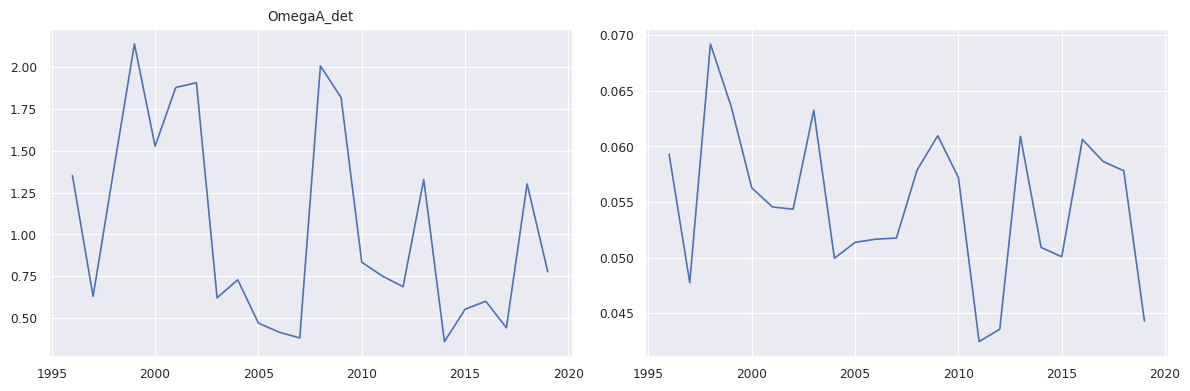

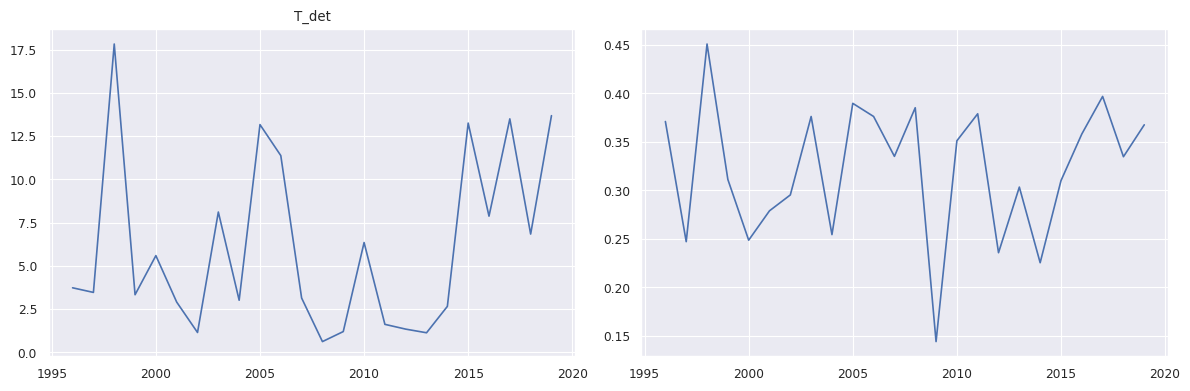

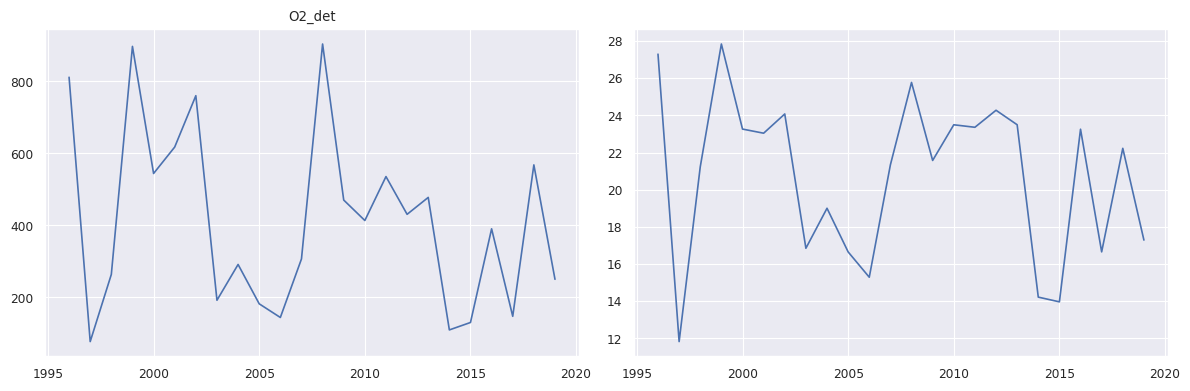

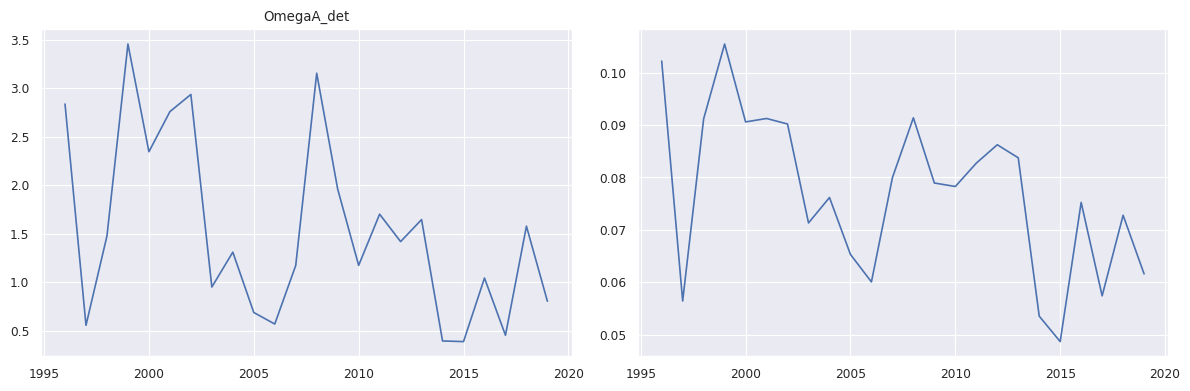

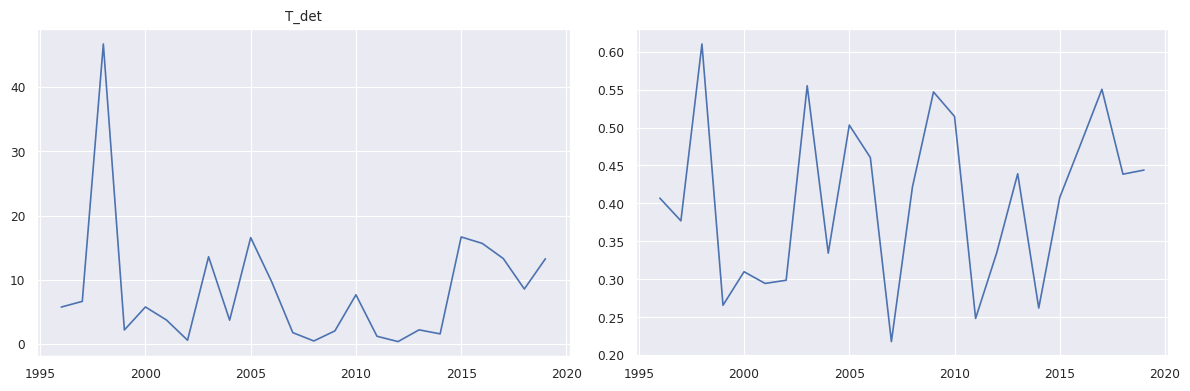

In [29]:
for cluster_label, cluster_ds in enumerate(clusters_ds):
    if cluster_label in plot_clusters2:
        print(f"Cluster: {cluster_label}")
        for var in timeseries_vars:
            plt.figure(figsize=(12,4))
            plot_cumulative_intensity(cluster_ds, var, thresholds[cluster_label], 'upwelling', upwelling_months)

In [34]:
def calculate_max_severity(intensity):
    """
    Calculate the duration of the times when a point in the cluster is extreme, return the average extreme duration
    """

    intensity_str = ','.join([str(value) for value in intensity])
    
    # Split the string into runs of ones using the '0' character as a separator.
    ones_runs = intensity_str.split(',0.0,')

    run_severity = []
    # Calculate and store the length of each run of non_zeroes
    for run in ones_runs:
        values = np.asarray(run.split(','), dtype=float)
        run_severity.append(np.sum(values))

    if len(run_severity)>0:
        max_severity = np.max(run_severity)
        return np.array([max_severity])
    else:
        return np.array([0.])

def plot_max_severity(cluster_ds, var, threshold, season, season_months):
    var_ds = cluster_ds[var+ '_det']
    if var == 'T':
        var_ds = var_ds - threshold[season][var+ '_det']
    else:
        var_ds = threshold[season][var+ '_det'] - var_ds
    var_ds = var_ds.where(var_ds > 0, 0)
    var_ds = var_ds.where(cluster_ds['time.month'].isin(season_months), 0)
    max_duration = []
    avg_duration = []
    years = []
    
    for year, ds_year in var_ds.groupby('time.year'):
        lengths = xr.apply_ufunc(calculate_max_severity, ds_year.load(), input_core_dims = [['time']], vectorize=True)
        max_duration.append(lengths.max(dim='stacked_y_x'))
        avg_duration.append(lengths.mean(dim='stacked_y_x'))
        years.append(year) 
    plt.figure()
    plt.bar(years, max_duration)

calculate_max_severity(cluster_ds.isel(stacked_y_x=1000).T.values)

array([76704.4334109])

In [35]:
test = ','.join([str(value) for value in cluster_ds.isel(stacked_y_x=1000).T.values])
np.array([float(value) for value in test.split('0.0')[0].split(',')])

array([ 8.326291 ,  7.863155 ,  7.6209493,  8.061132 ,  8.067279 ,
        7.887011 ,  7.558863 ,  8.126121 ,  8.292788 ,  8.272986 ,
        8.231575 ,  8.14197  ,  8.391077 ,  8.4621525,  8.493575 ,
        8.45345  ,  8.426122 ,  8.408993 ,  8.433296 ,  8.501505 ,
        8.4512205,  8.481694 ,  8.477672 ,  8.519216 ,  8.511538 ,
        8.48814  ,  8.50442  ,  8.585345 ,  8.643654 ,  8.628207 ,
        8.647863 ,  8.631546 ,  8.624605 ,  8.612491 ,  8.335956 ,
        8.021337 ,  8.072355 ,  7.867335 ,  8.021465 ,  8.229209 ,
        8.244963 ,  8.200647 ,  8.169395 ,  8.125918 ,  8.103298 ,
        8.082487 ,  8.060421 ,  8.010055 ,  7.8618135,  7.5965037,
        7.4441867,  7.5290985,  7.8386407,  8.175449 ,  8.163488 ,
        8.178917 ,  8.241667 ,  8.25691  ,  8.318208 ,  8.329591 ,
        8.323599 ,  8.30956  ,  8.320136 ,  8.3132305,  8.255792 ,
        8.167347 ,  8.252619 ,  8.099385 ,  7.894503 ,  8.310112 ,
        8.301878 ,  8.271179 ,  8.311082 ,  8.270735 ,  8.2503

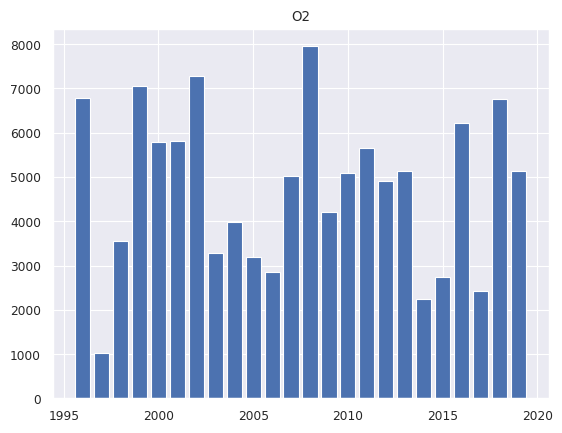

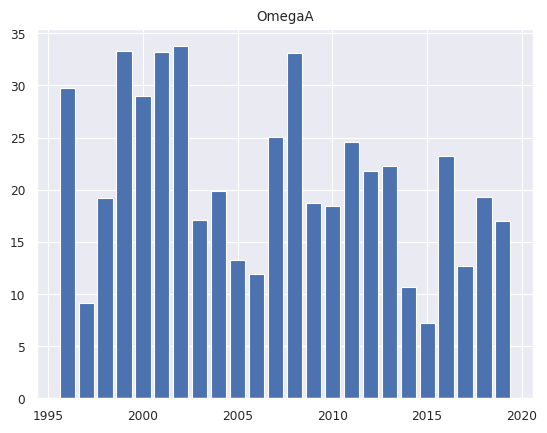

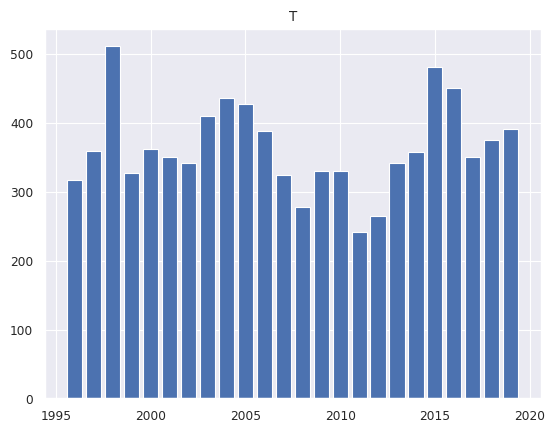

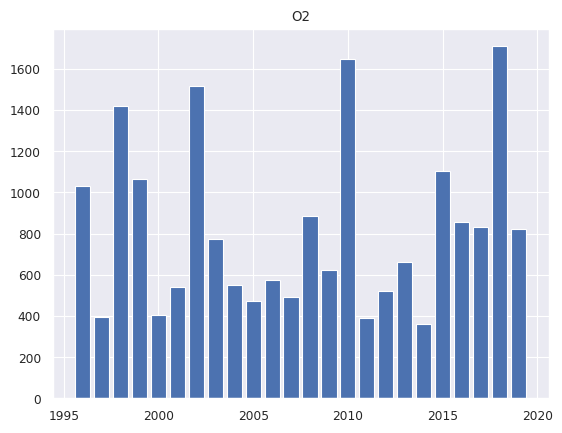

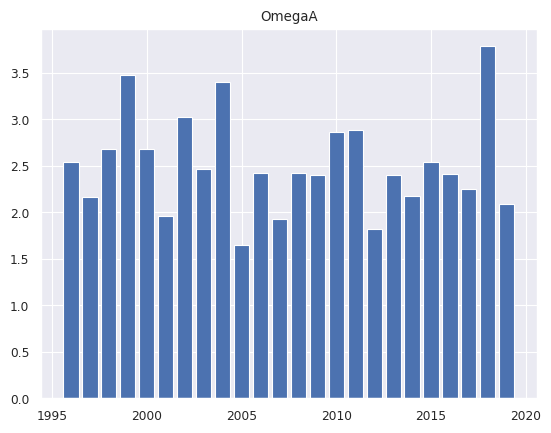

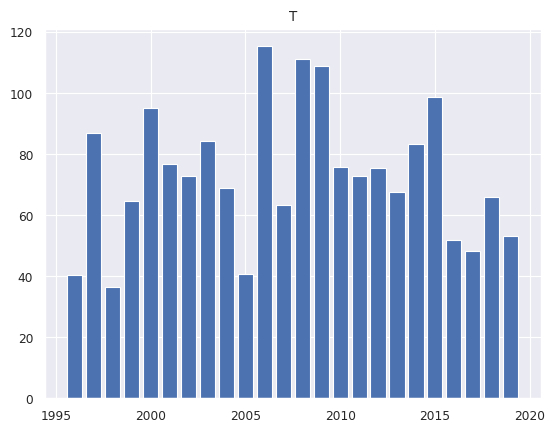

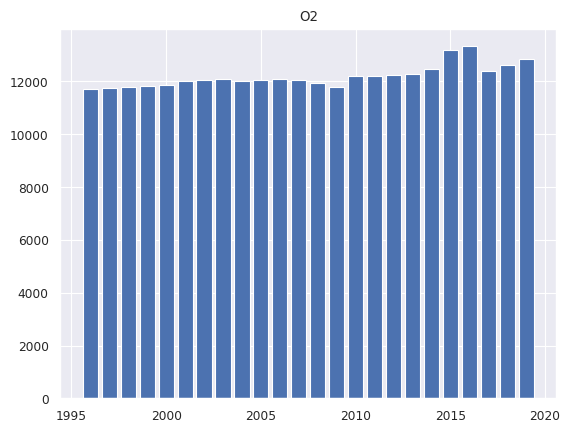

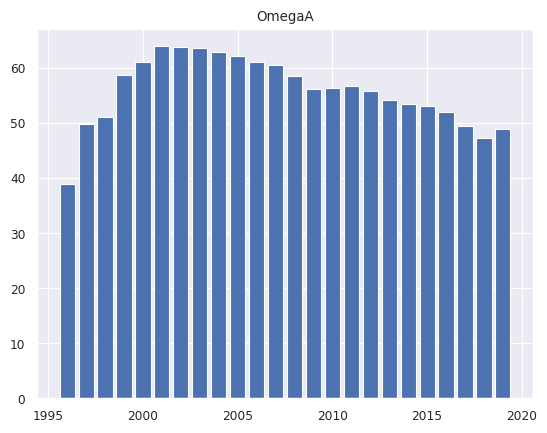

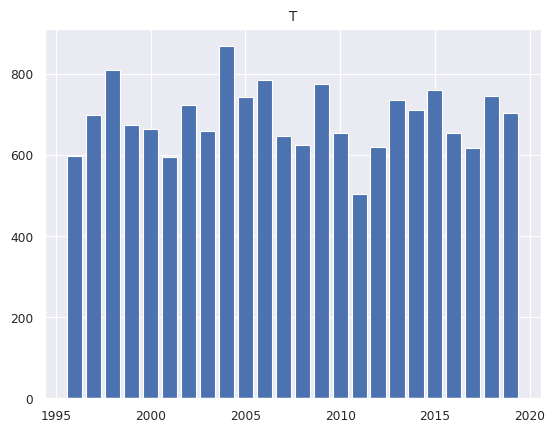

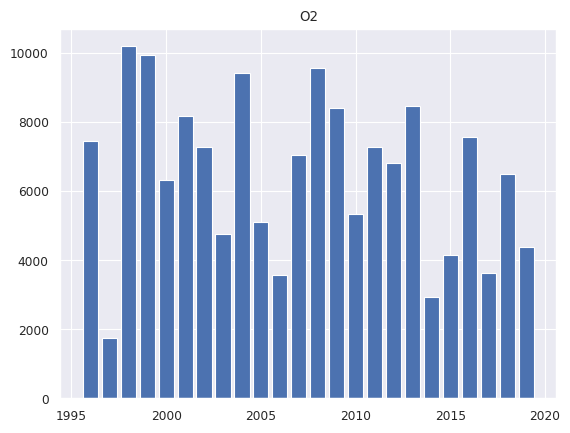

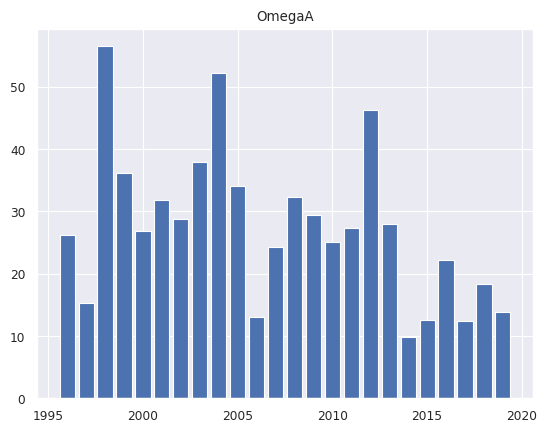

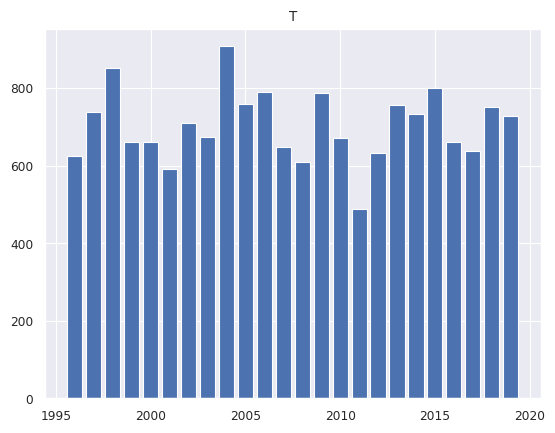

In [36]:
for cluster_label, cluster_ds in enumerate(clusters_ds):
    if cluster_label in plot_clusters2:
        for var in timeseries_vars:
            plot_max_severity(cluster_ds, var, thresholds[cluster_label], 'upwelling', upwelling_months)
            plt.title(var)